In [ ]:
! pip install pymongo;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pymongo import MongoClient

In [ ]:
#DESCARGO LAS LIBRERÍAS QUE VOY A USAR
from cgitb import html
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt 
import pymongo


#db.dropDatabase()
#db.competidores.drop()


#CARGO LA PÁGINA QUE VOY A USAR Y FORMO LA SOPA 
url = 'https://resultados.as.com/resultados/motor/motogp/clasificacion/?omnil=mpal'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

#ELIJO TRABAJAR CON LOS PILOTOS Y DESCARGO EL HTML
tablaPilotos = soup.find("div", {"id": "pilotos"})
pil = tablaPilotos.find_all('span', class_= 'main-name-in-row')

#HAGO PRINT PARA CONTROL DE PROCESO 1
print("PROC1:",pil)

#SELECCIONO TODOS LOS PILOTOS EN UNA LISTA
pilotos = list()

count = 0
for i in pil:
    if count < 32:
        pilotos.append(i.text)
    else:
        break
    count += 1

#HAGO PRINT PARA CONTROL DE PROCESO 2
print(pilotos, len(pilotos))

#ELIJO TRABAJAR CON LOS PUNTOS Y DESCARGO EL HTML
punt = tablaPilotos.find_all('td', class_= 'destacado')

#HAGO PRINT PARA CONTROL DE PROCESO 3
print(punt)

#SELECCIONO LOS PUNTOS DE TODOS LOS PILOTOS EN UNA LISTA
puntos = list()

count = 0
for i in punt:
    if count < 32:
        puntos.append(i.text)
    else:
        break
    count += 1

#HAGO PRINT PARA CONTROL DE PROCESO 4
print(puntos, len(puntos))

#ELABORO UN DATAFRAME CON PANDAS
dfPilotos = pd.DataFrame({'PILOTOS': pilotos, 'PUNTOS': puntos}, index=list (range(1,33)))

#HAGO PRINT PARA CONTROL DE PROCESO 5
print (dfPilotos)


##############################################################################################
#####################################    ESCUDERIAS     ######################################
print("\n -----------------------  Escuderias ---------------------------\n")
##############################################################################################

# TOMANDO DATOS DESDE LA PAGINA
tablaEscuderias = soup.find("div", {"id": "escuderias"})
esc = tablaEscuderias.find_all("span",class_= 'main-name-in-row')
escPts = tablaEscuderias.find_all("td",class_='destacado')

# INSERTANDO DATOS EN LISTAS
escuderias = list()
puntosEscuderias = list()

for i in esc:
  escuderias.append(i.text)

for i in escPts:
  puntosEscuderias.append(i.text)

# DATAFRAME CON LOS DATOS

dfEscuderia = pd.DataFrame({'ESCUDERIAS': escuderias, 'PUNTOS': puntosEscuderias}, index=list (range(1,7)))
print(dfEscuderia)


###################################################################################################
#############################  DATOS DE LOS PILOTOS  #######################################
print('\n-------------- DATOS DE LOS PILOTOS ----------------\n')
###################################################################################################

#VOY A SELECCIONAR EL LINK AL PERFIL DE CADA PILOTO
linkPiloto = tablaPilotos.find_all('a', class_= 'cont-enlace-equipo', href=True)

#GENERO LISTAS PARA GUARDAR LOS LINKS A LOS PERFILES Y OTROS DATOS
linksPilotos = list()
nombres = list()
edades = list()
fechasNacimientos = list()
alturas = list()
escudos = list()
pesos = list()
nacionalidades = list()
puntos = list()
gps = list()
victorias = list()

count = 0
for a in linkPiloto:
    if count < 32:
        linksPilotos.append(a['href'])
    else:
        break
    count += 1

#CARGO CADA URL PARA OBTENER LOS DATOS DE CADA PILOTO

for a in linksPilotos:
  url = 'https://resultados.as.com' + a
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')

  nombres.append(soup.find('h1', class_='sub-tit').text)
  edades.append(int((soup.find_all('article', class_='datos-ficha-jugador')[1]).find('strong').text.replace(' años','')))
  fechasNacimientos.append(soup.find('span', itemprop='birthDate')['content'])
  alturas.append(soup.find('strong', itemprop='height').text.replace(' cm',''))
  escudos.append(soup.find('span', class_='hdr-ficha-player-info-team-name').text)
  pesos.append(soup.find('strong', itemprop='weight').text.replace(' kg',''))
  nacionalidadPiloto = soup.find('header', class_='int-data-player-country')
  nacionalidades.append(nacionalidadPiloto.text.replace('\n',''))
  estadisticas = soup.find_all('section', class_='info-palmares cf')

  if len(estadisticas) > 1:
    estadisticas = estadisticas[1]
  else:
    estadisticas = estadisticas[0]

  puntos.append(int(estadisticas.find_all('p', class_='stats-big-number')[0].text.replace('\n','').replace('puntos','')))
  gps.append(int(estadisticas.find_all('p', class_='stats-big-number')[1].text.replace('\n','').replace('GPs','')))
  victorias.append(int(estadisticas.find('span', class_='s-pa in-circle-single').text.replace(' victorias','')))


# DATAFRAME CON DATOS

dfDatos = pd.DataFrame({'PILOTO': nombres, 'EDAD': edades, 'FECHA_NACIMIENTO': fechasNacimientos, 'ALTURA': alturas, 'ESCUDERIA_ACTUAL': escudos, 'NACIONALIDAD':nacionalidades, 'PESO': pesos, 'PUNTOS': puntos, 'GPs':gps, 'VICTORIAS':victorias})

print(dfDatos)

#GUARDO LOS DATOS EN UN FICHERO DE TXT
dfPilotos.to_csv('CLASIFICACIÓN_DE_PILOTOS_2022.csv', index=False)
dfEscuderia.to_csv('ESCUDERIA_2022.csv', index=False)
dfDatos.to_csv('TABLA_HISTORICA_PILOTOS_EN_CLASIFICACION.csv', index=False, encoding="utf-8")

from google.colab import files 
#files.download ('CLASIFICACIÓN_DE_PILOTOS.csv')
#files.download ('ESCUDERIA.csv')
files.download('TABLA_HISTORICA_PILOTOS_EN_CLASIFICACION.csv')

#SE DESCARGÓ EL ARCHIVO CON LOS DATOS EXTRAÍDOS
#SE PODRÁ ABRIR CON BLOCK DE NOTAS O PASAR A EXCEL O SIMILAR

PROC1: [<span class="main-name-in-row">Francesco Bagnaia</span>, <span class="main-name-in-row">Fabio Quartararo</span>, <span class="main-name-in-row">Enea Bastianini</span>, <span class="main-name-in-row">Aleix Espargaró</span>, <span class="main-name-in-row">Jack Miller</span>, <span class="main-name-in-row">Brad Binder</span>, <span class="main-name-in-row">Alex Rins</span>, <span class="main-name-in-row">Johann Zarco</span>, <span class="main-name-in-row">Jorge Martin</span>, <span class="main-name-in-row">Miguel Oliveira</span>, <span class="main-name-in-row">Maverick Viñales</span>, <span class="main-name-in-row">Luca Marini</span>, <span class="main-name-in-row">Marc Márquez</span>, <span class="main-name-in-row">Marco Bezzecchi</span>, <span class="main-name-in-row">Joan Mir Mayrata</span>, <span class="main-name-in-row">Pol Espargaró</span>, <span class="main-name-in-row">Álex Márquez</span>, <span class="main-name-in-row">Takaaki Nakagami</span>, <span class="main-name-in-ro

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from bs4 import BeautifulSoup
import requests
from pandas.io.parsers.python_parser import count_empty_vals
import pymongo

##################### Punto 1 ############################

client = MongoClient()
client.list_database_names()
db = client['MOTOGP']
collection = db['competidores']

#CARGO LA PÁGINA QUE VOY A USAR Y FORMO LA SOPA 
url = 'https://resultados.as.com/resultados/motor/motogp/clasificacion/?omnil=mpal'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

tablaPilotos = soup.find("div", {"id": "pilotos"})

linkPagina = tablaPilotos.find_all('a', class_= 'cont-enlace-equipo', href=True)


linksPilotos = []
for a in linkPagina:
  linksPilotos.append(a['href'])

''' count = 0
for i in linksPilotos:
  print(i) '''
        

#CARGO CADA URL PARA OBTENER LOS DATOS DE CADA PILOTO
for a in linksPilotos:
  url = 'https://resultados.as.com' + a
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')

  nombre = soup.find('h1', class_='sub-tit').text
  nacionalidadPiloto = soup.find('header', class_='int-data-player-country')
  nacionalidad = nacionalidadPiloto.text.replace('\n','')

  escuderiaLista = soup.findAll('span', class_='team-inline')
  
  count = 2022
  for i in escuderiaLista:
    escuderia = i.text
    ano = count
    gp = i.findNext('td').findNext('td').text
    victoria = i.findNext('td').findNext('td').findNext('td').findNext('td').text
    collection.insert_one({"nombre":nombre,"nacionalidad":nacionalidad,"ano":count,"escuderia":escuderia,"victorias":victoria,"GP":gp})
    count -= 1

   

############ REPRESENTACION EN FORMATO JSON DE LOS DATOS OBTENIDOS ###############
"""
        db = client['MOTOGP']
        collection = db['competidores']
        collection.insert_one(
            {
            "nombre":"",
            "nacionalidad":"",
            "ano": ,
            "escuderia": "", 
            "victorias":,
            "GP":,
            }) 
        """


'\n        db = client[\'MOTOGP\']\n        collection = db[\'competidores\']\n        collection.insert_one(\n            {\n            "nombre":"",\n            "nacionalidad":"",\n            "ano": ,\n            "escuderia": "", \n            "victorias":,\n            "GP":,\n            }) \n        '

In [ ]:
for i in collection.find():
  print(i)

In [ ]:
from bson.json_util import dumps
import json

collectionPaises = db['paises']
nacArray = collection.distinct("nacionalidad")

for nac in nacArray:
  vic = 0
  for i in collection.find({"nacionalidad":nac}):
    dict_json = json.loads(dumps(i))
    vic += int(dict_json["victorias"])
  collectionPaises.insert_one({"nacionalidad":nac,"victorias":vic})

In [ ]:
for i in collectionPaises.find():
  print(i)

{'_id': ObjectId('637504dfa18c4fd2ac549750'), 'nacionalidad': 'Italia', 'victorias': 84}
{'_id': ObjectId('637504dfa18c4fd2ac549751'), 'nacionalidad': 'Francia', 'victorias': 28}
{'_id': ObjectId('637504dfa18c4fd2ac549752'), 'nacionalidad': 'España', 'victorias': 188}
{'_id': ObjectId('637504dfa18c4fd2ac549753'), 'nacionalidad': 'Australia', 'victorias': 16}
{'_id': ObjectId('637504dfa18c4fd2ac549754'), 'nacionalidad': 'Sudáfrica', 'victorias': 18}
{'_id': ObjectId('637504dfa18c4fd2ac549755'), 'nacionalidad': 'Portugal', 'victorias': 17}
{'_id': ObjectId('637504dfa18c4fd2ac549756'), 'nacionalidad': 'Japón', 'victorias': 3}
{'_id': ObjectId('637504dfa18c4fd2ac549757'), 'nacionalidad': 'Reino Unido', 'victorias': 3}
{'_id': ObjectId('637504dfa18c4fd2ac549758'), 'nacionalidad': 'Alemania', 'victorias': 7}


In [ ]:
###### INFORME 1: Informar las nacionalidades de los pilotos más ganadores de grandes premios ######

nacionalidad = []
victorias = []
for x in collectionPaises.find().sort('victorias', pymongo.DESCENDING):
  dict_json = json.loads(dumps(x))
  nacionalidad.append(dict_json['nacionalidad'])
  victorias.append(dict_json['victorias'])

dfPaisesVictorias = pd.DataFrame({"Nacionalidad": nacionalidad, "Victorias": victorias})
print(dfPaisesVictorias)

  Nacionalidad  Victorias
0       España        188
1       Italia         84
2      Francia         28
3    Sudáfrica         18
4     Portugal         17
5    Australia         16
6     Alemania          7
7        Japón          3
8  Reino Unido          3


In [ ]:
collectionEsc = db['escuderia']
escArray = collection.distinct('escuderia')

for esc in escArray:
  vic = 0
  for i in collection.find({"escuderia":esc}):
    dict_json = json.loads(dumps(i))
    if (dict_json["ano"] > 2012 and dict_json["ano"] < 2023):
      vic += int(dict_json["victorias"])
  collectionEsc.insert_one({"escuderia":esc,"victorias":vic})

In [ ]:
###### INFORME 2: Informar las escuderias más ganadoras de los ultimos 10 años ######

escuderias = []
victorias = []
for x in collectionEsc.find().sort('victorias', pymongo.DESCENDING):
  dict_json = json.loads(dumps(x))
  escuderias.append(dict_json['escuderia'])
  victorias.append(dict_json['victorias'])

dfEscuderiaVictorias = pd.DataFrame({"Escuderia": escuderias, "Victorias": victorias})
print(dfEscuderiaVictorias)

         Escuderia  Victorias
0            HONDA         91
1            KALEX         79
2              KTM         57
3           DUCATI         35
4           YAMAHA         28
5           SUZUKI          7
6         MAHINDRA          2
7       BOSCOSCURO          1
8          APRILIA          1
9        FTR HONDA          0
10             ART          0
11      PONS KALEX          0
12       KALEX KTM          0
13     SUTER HONDA          0
14  CATERHAM SUTER          0
15           DERBI          0
16           SUTER          0
17             FTR          0
18          TECH 3          0
19        MORIWAKI          0
20        MALAGUTI          0
21             TSR          0
22          MOTOBI          0
23            IODA          0


In [ ]:
collectionEfect = db['efectividad']
nombreArray = collection.distinct('nombre')

for nombre in nombreArray:
  vic = 0
  gp = 0
  for i in collection.find({"nombre":nombre}):
    dict_json = json.loads(dumps(i))
    if (dict_json["ano"] > 2019):
      vic += int(dict_json["victorias"])
      gp += int(dict_json["GP"])
  collectionEfect.insert_one({"nombre":nombre,"efectividad":(vic*100)/gp})

In [ ]:
for i in collectionEfect.find():
  print(i)

{'_id': ObjectId('637505d9a18c4fd2ac549771'), 'nombre': 'Francesco Bagnaia', 'efectividad': 22.448979591836736}
{'_id': ObjectId('637505d9a18c4fd2ac549772'), 'nombre': 'Fabio Quartararo', 'efectividad': 21.153846153846153}
{'_id': ObjectId('637505d9a18c4fd2ac549773'), 'nombre': 'Enea Bastianini', 'efectividad': 13.20754716981132}
{'_id': ObjectId('637505d9a18c4fd2ac549774'), 'nombre': 'Aleix Espargaró', 'efectividad': 1.9230769230769231}
{'_id': ObjectId('637505d9a18c4fd2ac549775'), 'nombre': 'Jack Miller', 'efectividad': 5.769230769230769}
{'_id': ObjectId('637505d9a18c4fd2ac549776'), 'nombre': 'Brad Binder', 'efectividad': 3.8461538461538463}
{'_id': ObjectId('637505d9a18c4fd2ac549777'), 'nombre': 'Alex Rins', 'efectividad': 6.25}
{'_id': ObjectId('637505d9a18c4fd2ac549778'), 'nombre': 'Johann Zarco', 'efectividad': 0.0}
{'_id': ObjectId('637505d9a18c4fd2ac549779'), 'nombre': 'Jorge Martin', 'efectividad': 6.382978723404255}
{'_id': ObjectId('637505d9a18c4fd2ac54977a'), 'nombre': 'Mi

In [ ]:
###### INFORME 3: Informar efectividad de los pilotos en las últimas 3 temporadas ######

nombres = []
efectividad = []
for i in collectionEfect.find().sort("efectividad",pymongo.DESCENDING):
  dict_json = json.loads(dumps(i))
  nombres.append(dict_json['nombre'])
  efectividad.append(dict_json['efectividad'])

dfEfectividad = pd.DataFrame({"Nombre": nombres, "Efectividad": efectividad})
print(dfEfectividad)

                   Nombre  Efectividad
0       Francesco Bagnaia    22.448980
1        Fabio Quartararo    21.153846
2          Raúl Fernández    19.607843
3         Enea Bastianini    13.207547
4            Remy Gardner    11.764706
5            Marc Márquez    11.111111
6         Miguel Oliveira     9.615385
7            Jorge Martin     6.382979
8       Franco Morbidelli     6.382979
9               Alex Rins     6.250000
10            Jack Miller     5.769231
11            Luca Marini     5.660377
12        Marco Bezzecchi     5.660377
13      Tetsuta Nagashima     4.545455
14       Maverick Viñales     4.166667
15            Brad Binder     3.846154
16       Andrea Dovizioso     3.030303
17        Danilo Petrucci     3.030303
18       Joan Mir Mayrata     2.083333
19        Aleix Espargaró     1.923077
20  Fabio Di Giannantonio     1.886792
21          Darryn Binder     1.886792
22           Johann Zarco     0.000000
23          Pol Espargaró     0.000000
24           Álex Márquez

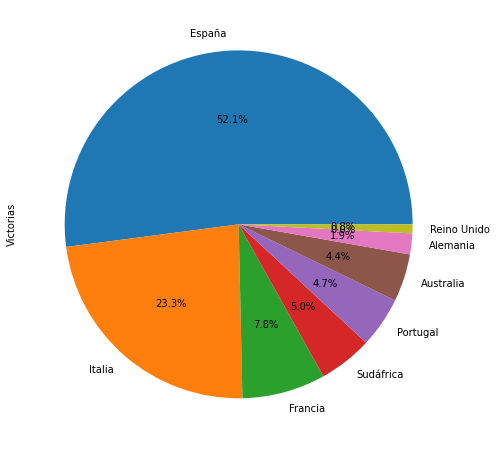

In [ ]:
#Grafica que muestra las nacionalidades en porcentaje
serie = dfPaisesVictorias.Victorias
serie.index = dfPaisesVictorias.Nacionalidad
serie.plot.pie(autopct='%1.1f%%',figsize=(8, 8))

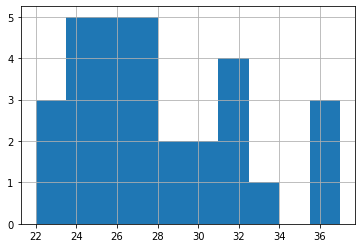

In [ ]:
#Grafica que muestra las edades de menor a mayor
dfDatos.EDAD.hist()




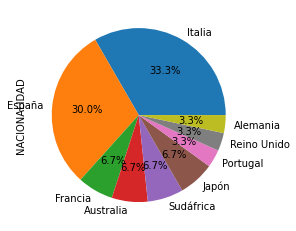

In [ ]:
#Grafica que muestra las nacionalidades en porcentaje
serie = dfDatos.NACIONALIDAD.value_counts()
serie.plot.pie(autopct='%1.1f%%')

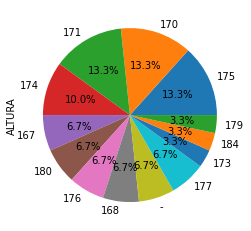

In [ ]:
#Grafica que muestra la altura de los pilotos
serie = dfDatos.ALTURA.value_counts()
serie.plot.pie(autopct='%1.1f%%')

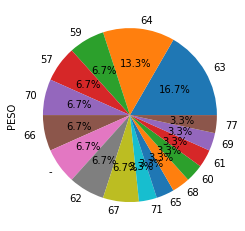

In [ ]:
#Grafica que muestra el peso de los pilotos en porcentaje
serie = dfDatos.PESO.value_counts()
serie.plot.pie(autopct='%1.1f%%')

In [ ]:
#Calcular y mostrar el peso maximo
dfDatos["PESO"].max()

'77'

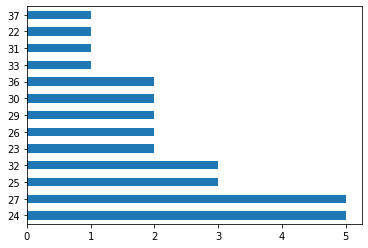

In [ ]:
#Grafica que muestra las edades de menor a mayor
serie_edad = dfDatos.EDAD.value_counts()
serie_edad.plot.barh()

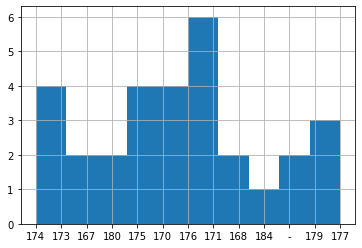

In [ ]:
#Grafica de las alturas de los pilotos
dfDatos.ALTURA.hist()

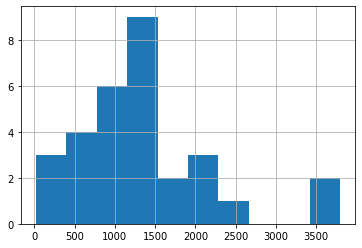

In [ ]:
#Grafica que muestra los puntos obtenidos por los pilotos
serie = dfDatos.PUNTOS.hist()

In [ ]:
#La altura del piloto mas alto
dfDatos["ALTURA"].max()

'184'

In [ ]:
#El piloto con la edad mas grande
dfDatos["EDAD"].max()

37

In [ ]:
#La edad del piloto mas joven
dfDatos["EDAD"].min()

22

In [ ]:
#El numero maximo de los puntos obtenidos
dfDatos["PUNTOS"].max()

3796

In [ ]:
#El promedio de edad de los pilotos 
dfDatos["EDAD"].mean()

27.9

In [ ]:
#El promedio de los puntos de los pilotos
dfDatos["PUNTOS"].mean()


1330.2

In [ ]:
!apt install mongodb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libpcap0.8 libstemmer0d libyaml-cpp0.5v5 mongo-tools mongodb-clients
  mongodb-server mongodb-server-core
The following NEW packages will be installed:
  libpcap0.8 libstemmer0d libyaml-cpp0.5v5 mongo-tools mongodb mongodb-clients
  mongodb-server mongodb-server-core
0 upgraded, 8 newly installed, 0 to remove and 5 not upgraded.
Need to get 53.1 MB of archives.
After this operation, 215 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpcap0.8 amd64 1.8.1-6ubuntu1.18.04.2 [118 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libstemmer0d amd64 0+svn585-1build1 [62.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 liby

In [ ]:
!service mongodb start

 * Starting database mongodb
   ...done.


In [ ]:
client = MongoClient()
client.list_database_names()
db = client['MOTOGP']
collection = db['competidores']